In [57]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from pathlib import Path
from scipy import ndimage

In [4]:
DATA=Path('/Users/jonniebarnsley/data/karthaus24/group11-project')

In [14]:
def assemble_isochrone(time_period, coarsen_factor=1):

    N = int(15500 / coarsen_factor)
    da = np.zeros([N, N])
    for confidence in ['high', 'med', 'low', 'very_low']:
        filepath = DATA / 'PaleoGrIS_1.0_isochrone_lines_ziparchive' / f'{time_period}_ka_{confidence}_confidence_isochrone.nc'

        try:
            file = xr.open_dataset(filepath)
        except FileNotFoundError:
            continue
        
        coarse = file.coarsen(x=coarsen_factor, y=coarsen_factor).max()
        iso = coarse.isochrone
        da = np.maximum(da, iso)
    
    return da

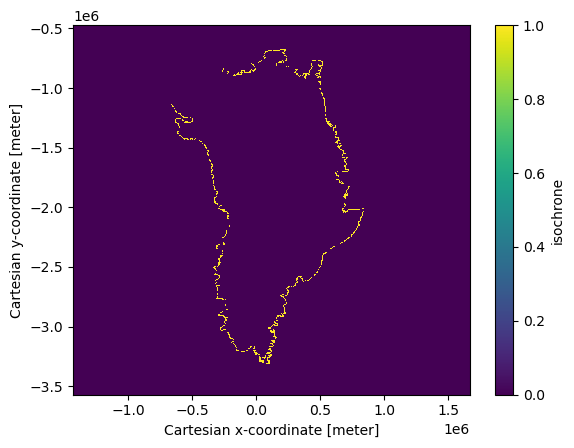

In [15]:
assemble_isochrone('10.5-10', coarsen_factor=25).plot()

In [22]:
time_boundaries = ['7.0', '7.5', '8.0', '8.5', '9.0', '9.5', '10', '10.5', '11', '11.5', '12', '13', '14']
time_boundaries.reverse()

In [27]:
filepath = DATA / 'isochrone_buffers/PaleoGrIS_1.0_isochrone_buffers_2km_age.nc'
file = xr.open_dataset(filepath)
file

<xarray.Dataset>
Dimensions:    (x: 1550, y: 1550)
Coordinates:
  * x          (x) float32 -1.428e+06 -1.426e+06 ... 1.668e+06 1.67e+06
  * y          (y) float32 -3.571e+06 -3.569e+06 ... -4.75e+05 -4.73e+05
Data variables:
    mapping    |S1 ...
    isochrone  (y, x) float32 ...
    lat        (y, x) float32 ...
    lon        (y, x) float32 ...
Attributes:
    NCO:      netCDF Operators version 5.1.6 (Homepage = http://nco.sf.net, C...
    history:  history goes here

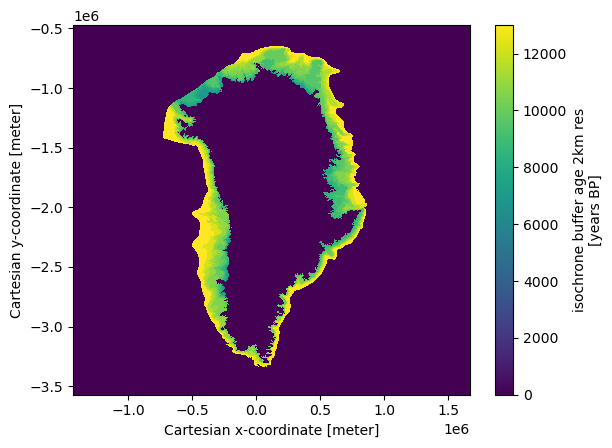

In [34]:
x = file.x
y = file.y
iso = file.isochrone

iso.plot()

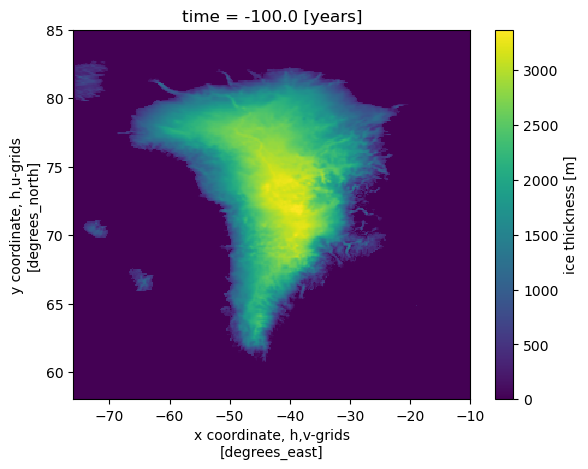

In [39]:
filepath = DATA / 'ncfiles/variable-seasonality.nc'
file = xr.open_dataset(filepath)
h = file.h
h.sel(time=-100).plot()

In [71]:
def get_contour(model_filepath, year):

    # load file into memory and select time
    file = xr.open_dataset(model_filepath)
    timeslice = file.sel(time=-year) # negative year since time axis is from -22k to 0
    
    # create mask of ice sheet height > 0
    height = timeslice.h
    mask = xr.where(height > 0, 1, 0)

    # use binary erosion to get trace of ice sheet edge
    contour = mask - ndimage.binary_erosion(mask)

    # save as xarray DataArray
    x = mask.x1
    y = mask.y1
    da = xr.DataArray(data = contour, coords = {'x': x, 'y': y})

    return da

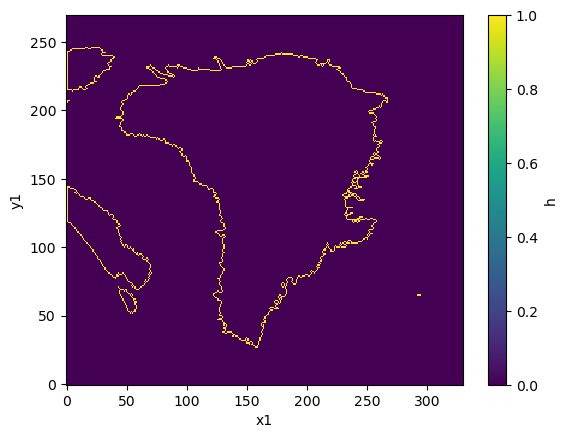

In [72]:
variable_seasonality = DATA / 'ncfiles/variable-seasonality.nc'

mask = get_contour(variable_seasonality, 10000)
mask.plot()

In [64]:
outline = mask - ndimage.binary_erosion(mask)

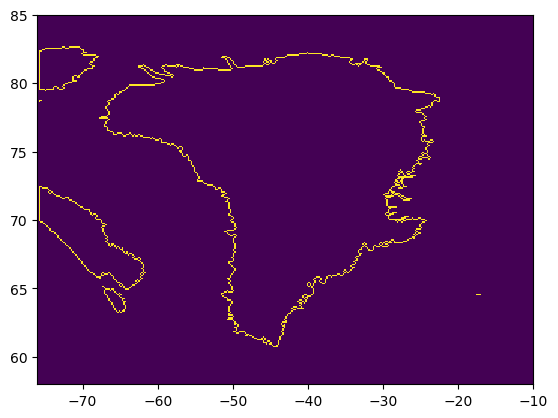

In [65]:
x = mask.x1
y = mask.y1

plt.pcolormesh(x, y, outline)